# GLASS IDENTIFICATION FOR FORENSIC SCIENCE USING R


The analysis is based study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!.

The data is created by B. German,Central Research Establishment,Forensic Science Service, Aldermaston, Reading.

Read more on the data at : https://archive.ics.uci.edu/ml/datasets/glass+identification. The task ia a multinomial classification problem, to identify the glass type/class based on the chemical contents. 

Read more on multinomial logistic regression/Softmax regression at : http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/ 
 
 Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
   10. Fe: Iron
   11. Type of glass: (class attribute)
   
The classes to be identified are :

   1. building_windows_float_processed 
   2. building_windows_non_float_processed 
   3. vehicle_windows_float_processed 
   4. vehicle_windows_non_float_processed (none in this database) 
   5. containers 
   6. tableware 
   7. headlamps
  
The analysis in done in R. 


Start by loading libraries for R

In [1]:
library(caTools)
library(ggplot2)
library(lattice)
library(caret)
library(e1071)
library(randomForest)
library(GGally)
library(nnet)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



Now read the dataset

In [2]:
# Importing the dataset
glassdata <- read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"))

In [3]:
head(glassdata,10)
dim(glassdata)

X1,X1.52101,X13.64,X4.49,X1.10,X71.78,X0.06,X8.75,X0.00,X0.00.1,X1.1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1
7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0,0.00,1
8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0,0.00,1
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0,0.00,1
10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0,0.11,1
11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0,0.24,1


[1] 213  11

The dataset has 213 instances with 11 columns. We now check for NA's, do a random shuffle for the dataset

## Data Preprocessing

In [4]:
#checking for NA's
sum(is.na(glassdata))

[1] 0

In [5]:
glassdata <- glassdata[sample(1:nrow(glassdata)),]
head(glassdata,10)

,X1,X1.52101,X13.64,X4.49,X1.10,X71.78,X0.06,X8.75,X0.00,X0.00.1,X1.1
41,42,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0,0.00,1
182,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0,0.00,6
89,90,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0,0.09,2
68,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0,0.16,1
67,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0,0.17,1
90,91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0,0.22,2
155,156,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0,0.00,3
165,166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0,0.00,5
201,202,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0,0.00,7
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0,0.00,2


Now assign column names for the data

In [6]:
colnames(glassdata) <- c("Idnumber","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","class")

In [7]:
head(glassdata,10)
str(glassdata)

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
41,42,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0,0.00,1
182,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0,0.00,6
89,90,1.51640,12.55,3.48,1.87,73.23,0.63,8.08,0,0.09,2
68,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0,0.16,1
67,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0,0.17,1
90,91,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0,0.22,2
155,156,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0,0.00,3
165,166,1.52171,11.56,1.88,1.56,72.86,0.47,11.41,0,0.00,5
201,202,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0,0.00,7
111,112,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0,0.00,2


'data.frame':	213 obs. of  11 variables:
 $ Idnumber: int  42 183 90 69 68 91 156 166 202 112 ...
 $ RI      : num  1.52 1.52 1.52 1.52 1.52 ...
 $ Na      : num  12.7 14.2 12.6 13.1 13.1 ...
 $ Mg      : num  3.42 0 3.48 3.58 3.65 3.74 3.4 1.88 0 0 ...
 $ Al      : num  1.2 2.09 1.87 0.9 0.87 1.11 1.26 1.56 1.19 0.75 ...
 $ Si      : num  73.2 72.7 73.2 72.2 72.3 ...
 $ K       : num  0.59 0 0.63 0.23 0.19 0.64 0.52 0.47 2.7 0 ...
 $ Ca      : num  8.64 10.88 8.08 9.82 9.85 ...
 $ Ba      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Fe      : num  0 0 0.09 0.16 0.17 0.22 0 0 0 0 ...
 $ class   : int  1 6 2 1 1 2 3 5 7 2 ...


Observe that class is an 'int' type data. This needs to be converted into factors for classification.

In [8]:
glassdata$class <-factor(glassdata$class)

Now this is a multi class classification. For that we need to choose one class as a reference.

In [9]:
#Set a reference level using relevel function
glassdata$class <- relevel(glassdata$class, ref ="1")

## Data Visualization

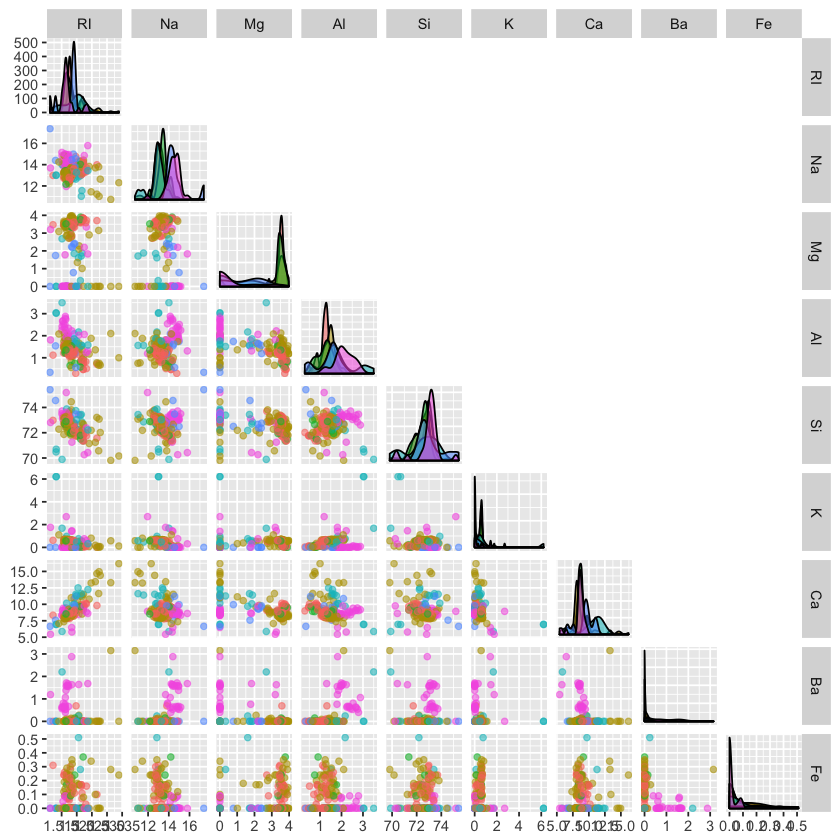

In [10]:
ggpairs(glassdata, columns = 2:10, upper = "blank", aes(colour = class, alpha = 0.8))

Observed some nonlinearities in data ?

## Split data into training and test sets

In [11]:
# Splitting the dataset into the Training set and Test set
set.seed(123)
split = sample.split(glassdata$class, SplitRatio = 0.75)
training_set = subset(glassdata, split == TRUE)
test_set = subset(glassdata, split == FALSE)
#dim(training_set)
#dim(test_set)

## Feature Scaling

In [12]:
# Feature Scaling
training_set[,-11] <- scale(training_set[,-11])
test_set[,-11] <- scale(test_set[,-11])

Now, to perform Multinomial Logistic Regression, we cannot use the glm ( ) function. We have to make uste of the multinom ( ) function from the 'nnet' package

In [13]:
# Fitting Softmax Logistic Regression to the Training set
classifier = multinom(formula = class ~ RI+Na+Mg+Al+Si+K+Ca+Ba+Fe,
                 data = training_set)

# weights:  66 (50 variable)
initial  value 288.473275 
iter  10 value 122.194710
iter  20 value 99.983986
iter  30 value 86.542714
iter  40 value 81.350503
iter  50 value 78.344866
iter  60 value 77.916377
iter  70 value 77.635631
iter  80 value 77.493056
iter  90 value 77.467662
iter 100 value 77.467370
final  value 77.467370 
stopped after 100 iterations


In [14]:
summary(classifier)

Call:
multinom(formula = class ~ RI + Na + Mg + Al + Si + K + Ca + 
    Ba + Fe, data = training_set)

Coefficients:
   (Intercept)          RI          Na          Mg          Al         Si
2    3.4821416   0.8544383   -4.391079  -11.174189  -0.5587923  -4.807463
3   -0.9300421  -9.2162113    1.533331    4.409417   0.1222920  -2.462355
5 -278.3242348 -66.4236237 -120.384802 -272.882965 122.2981611 -75.139222
6 -285.8745971   7.1320276  155.952534    2.959176  98.4364262 119.405923
7 -247.0174383 229.1458389  245.692218   34.830517 180.9961491 260.730827
             K         Ca          Ba            Fe
2   -3.3334028  -9.496918    1.452250    0.06692091
3   -0.5298823  10.073226    7.929066    0.60700117
5   23.6782027 -65.249050  -97.534602  -10.63371451
6 -149.4410488  37.421454 -100.058359 -150.16756943
7  113.0415804  12.057885  108.667920 -162.74412128

Std. Errors:
   (Intercept)           RI           Na           Mg           Al           Si
2 1.751578e+00 9.841703e-01 2.457

Now lets make predictions and print the confusion matrix

In [15]:
y_pred <- predict(classifier,newdata = test_set[-11])

In [16]:
confusion_matrix <- table(y_pred, test_set$class)
confusion_matrix

      
y_pred  1  2  3  5  6  7
     1 12  6  1  0  0  0
     2  3 10  3  0  0  0
     3  2  1  0  0  0  0
     5  0  1  0  3  0  0
     6  0  1  0  0  2  0
     7  0  0  0  0  0  7

In [17]:
sum(diag(confusion_matrix))/52

[1] 0.6538462

Observe that Logistic Regression cannot capture the features of the test set. Accuracy is only 65.3 %

Now lets implement SVM classification with the radial kernel

In [18]:
# Feature Scaling
training_set[,-11] <- scale(training_set[,-11])
test_set[,-11] <- scale(test_set[,-11])

classifier = svm(formula = class ~ RI+Na+Mg+Al+Si+K+Ca+Ba+Fe,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-11])

# Making the Confusion Matrix
cm = table(y_pred, test_set$class)
cm
sum(diag(cm))/52

      
y_pred  1  2  3  5  6  7
     1 15  7  2  0  0  0
     2  2 11  2  2  1  0
     3  0  0  0  0  0  0
     5  0  0  0  1  0  0
     6  0  1  0  0  1  0
     7  0  0  0  0  0  7

[1] 0.6730769

The accuracy imporvement is only to 67.3 %. Finally, lets implement the random forests and see results.

In [19]:
split = sample.split(glassdata$class, SplitRatio = 0.75)
training_set = subset(glassdata, split == TRUE)
test_set = subset(glassdata, split == FALSE)

library(randomForest)
set.seed(123)
classifier = randomForest(x = training_set[-11],
                          y = training_set$class,
                          ntree = 500)

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-11])

# Making the Confusion Matrix
cm = table(y_pred,test_set$class)
cm
sum(diag(cm))/52

      
y_pred  1  2  3  5  6  7
     1 17  0  0  0  0  0
     2  0 19  1  0  0  0
     3  0  0  3  0  0  0
     5  0  0  0  2  0  0
     6  0  0  0  0  2  0
     7  0  0  0  1  0  7

[1] 0.9615385

As with the random forests, the accuracy is 96.15 % which is good enough.

## Concluding Remarks

1. The nonlinearities in the data are captured only by random forests and not by the multinomial regressionans SVM's.
2. The prediction accuracy of the test set with random forests is 96 % where as that with SVM's and logitsic regression is < 70 %.